### Purpose: Evaluate tweet sentiment from major news sources.
### First Plot.  (Saved as Figure1.png)
        # Scatterplot of last 100 tweets sent out by each news organization.
        # Each plot will reflect the compound sentiment of a tweet.
        # Sort each plot point by its relative timestamp.
        
### Second plot.  (Saved as Figure2.png)
        # Perform a sentiment analysis with the compound, positive, neutral, negative scoring for each tweet.
        # Pull into a df the tweet's source account, text, date, compound/pos/neu/neg scoring. (Saved as Data.csv)
        # Export the data in the df into a csv file.
        # Save a PNG for each plot.

In [1]:
# Import dependencies
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())

### Get the Data, put in dataframe.

In [3]:
target_news = ["@bbcworld", "@cbsnews", "@cnn", "@foxnews", "@nytimes"]
df = []
df1 = []

for target in target_news:
    compound_dump = []
    positive_dump = []
    neutral_dump = []
    negative_dump = []
    counter_dump = []
    text_dump = []
    date_dump = []
    counter = 1
    
    for x in range(5):
        public_tweets = api.user_timeline(target)
        for tweet in public_tweets:
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            positive = analyzer.polarity_scores(tweet["text"])["pos"]
            neutral = analyzer.polarity_scores(tweet["text"])["neu"]
            negative = analyzer.polarity_scores(tweet["text"])["neg"]
            
            time = tweet["created_at"]
            converted_time = datetime.strptime(time, "%a %b %d %H:%M:%S %z %Y")
            
            compound_dump.append(compound)
            positive_dump.append(positive)
            neutral_dump.append(neutral)
            negative_dump.append(negative)
            counter_dump.append(counter)
            text_dump.append(tweet["text"])
            date_dump.append(converted_time)
            counter += 1
            
    df.append({
        "Compound": compound_dump,
        "Positive": positive_dump,
        "Neutral": neutral_dump,
        "Negative": negative_dump,
        "Counter": counter_dump,
        "Text": text_dump,
        "Date": date_dump
    })
            
    
    df1 = pd.DataFrame(df)
df2 = pd.DataFrame()

In [4]:
df2["Counter"] = df1["Counter"][0]
df2["BBC Compound"] = df1["Compound"][0]
df2["BBC Positive"] = df1["Positive"][0]
df2["BBC Neutral"] = df1["Neutral"][0]
df2["BBC Negative"] = df1["Negative"][0]
df2["BBC Text"] = df1["Text"][0]
df2["BBC Date/Time"] = df1["Date"][0]

df2["CBS Compound"] = df1["Compound"][1]
df2["CBS Positive"] = df1["Positive"][1]
df2["CBS Neutral"] = df1["Neutral"][1]
df2["CBS Negative"] = df1["Negative"][1]
df2["CBS Text"] = df1["Text"][1]
df2["CBS Date/Time"] = df1["Date"][1]

df2["CNN Compound"] = df1["Compound"][2]
df2["CNN Positive"] = df1["Positive"][2]
df2["CNN Neutral"] = df1["Neutral"][2]
df2["CNN Negative"] = df1["Negative"][2]
df2["CNN Text"] = df1["Text"][2]
df2["CNN Date/Time"] = df1["Date"][2]

df2["FOX Compound"] = df1["Compound"][3]
df2["FOX Positive"] = df1["Positive"][3]
df2["FOX Neutral"] = df1["Neutral"][3]
df2["FOX Negative"] = df1["Negative"][3]
df2["FOX Text"] = df1["Text"][3]
df2["FOX Date/Time"] = df1["Date"][3]

df2["NYT Compound"] = df1["Compound"][4]
df2["NYT Positive"] = df1["Positive"][4]
df2["NYT Neutral"] = df1["Neutral"][4]
df2["NYT Negative"] = df1["Negative"][4]
df2["NYT Text"] = df1["Text"][4]
df2["NYT Date/Time"] = df1["Date"][4]

df2.to_csv("Data.csv")
df2.head(100)

,Counter,BBC Compound,BBC Positive,BBC Neutral,BBC Negative,BBC Text,BBC Date/Time,CBS Compound,CBS Positive,CBS Neutral,...,FOX Neutral,FOX Negative,FOX Text,FOX Date/Time,NYT Compound,NYT Positive,NYT Neutral,NYT Negative,NYT Text,NYT Date/Time
0,1,-0.7650,0.000,0.577,0.423,Cold War: How do Russia tensions compare to So...,2018-03-26 23:08:48+00:00,0.3612,0.106,0.894,...,0.763,0.237,.@JesseBWatters: “The guy had a rifle because ...,2018-03-26 23:58:48+00:00,-0.5574,0.000,0.735,0.265,RT @maggieNYT: NEWS: Trump Talks of Bringing B...,2018-03-27 00:02:02+00:00
1,2,0.0000,0.000,1.000,0.000,Actor Anthony Wong finds family who never knew...,2018-03-26 23:08:47+00:00,0.5801,0.185,0.815,...,0.904,0.000,.@KyleKashuv: “Gun control won’t solve this is...,2018-03-26 23:47:52+00:00,0.5106,0.355,0.645,0.000,"Villanova has a beloved team chaplain, too htt...",2018-03-26 23:47:06+00:00
2,3,-0.2960,0.000,0.804,0.196,James Packer: Resignation puts focus on 'high-...,2018-03-26 22:56:56+00:00,0.0000,0.000,1.000,...,0.881,0.119,.@dbongino: “The problem with this debate is y...,2018-03-26 23:41:55+00:00,-0.8957,0.000,0.565,0.435,RT @nytimesworld: She escaped a 1942 roundup o...,2018-03-26 23:32:04+00:00
3,4,-0.5423,0.000,0.720,0.280,Brazil's female sports reporters call time on ...,2018-03-26 22:49:20+00:00,0.8807,0.375,0.625,...,0.794,0.206,.@Judgenap on former hostage accusing FBI of m...,2018-03-26 23:24:30+00:00,-0.5574,0.000,0.833,0.167,Linda Brown has died. The Kansas schoolgirl ca...,2018-03-26 23:17:04+00:00
4,5,0.0000,0.000,1.000,0.000,Yuri Gagarin: First man in space https://t.co/...,2018-03-26 22:39:35+00:00,0.0000,0.000,1.000,...,0.699,0.179,Former Al Qaeda hostage in Syria alleges FBI s...,2018-03-26 23:17:19+00:00,0.0000,0.000,1.000,0.000,Planning a trip to Memphis? Here's what you sh...,2018-03-26 23:02:04+00:00
5,6,-0.2263,0.000,0.826,0.174,DR Congo massacre: 'My daughter was slashed wi...,2018-03-26 21:30:28+00:00,-0.2960,0.000,0.891,...,0.719,0.281,"Linda Brown, center of Brown v. Board case, de...",2018-03-26 23:09:14+00:00,0.0000,0.000,1.000,0.000,Evening Briefing: Here's what you need to know...,2018-03-26 22:45:06+00:00
6,7,0.0000,0.000,1.000,0.000,RT @danroan: Here’s Cricket Australia ball-tam...,2018-03-26 20:30:10+00:00,-0.4019,0.000,0.802,...,0.839,0.161,BREAKING: Multiple suspicious packages contain...,2018-03-26 22:56:05+00:00,-0.1531,0.113,0.708,0.179,“This is a deplorable way to treat a veteran w...,2018-03-26 22:32:03+00:00
7,8,-0.0191,0.000,0.946,0.054,RT @BBCSport: 'It doesn't matter what they ach...,2018-03-26 19:35:13+00:00,0.0000,0.000,1.000,...,0.843,0.000,".@MZHemingway: “Objectively speaking, [Preside...",2018-03-26 22:50:01+00:00,0.4939,0.186,0.814,0.000,A sprawling exhibition in Amsterdam looks at h...,2018-03-26 22:17:03+00:00
8,9,0.0000,0.000,1.000,0.000,'North Korean train' in Beijing fuels rumours ...,2018-03-26 18:51:12+00:00,-0.8750,0.000,0.655,...,0.849,0.000,John Sununu: “The president is…trying to reduc...,2018-03-26 22:42:00+00:00,0.6124,0.274,0.639,0.086,RT @jeligon: .@es_snipes fought vigorously for...,2018-03-26 21:47:02+00:00
9,10,-0.4215,0.000,0.763,0.237,Stormy Daniels: White House 'strongly' denies ...,2018-03-26 18:47:31+00:00,0.1280,0.077,0.923,...,0.763,0.237,Stoneman Douglas memorial site robbed of teddy...,2018-03-26 22:34:00+00:00,0.5859,0.211,0.789,0.000,Here's how to create your own support system w...,2018-03-26 21:32:07+00:00


### Plot1.  Scatter Plot.

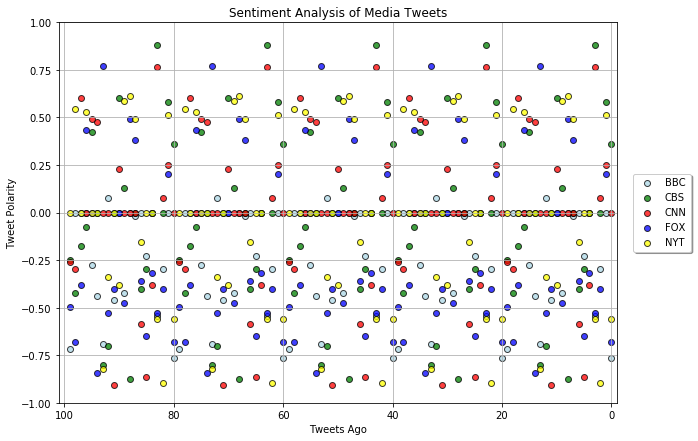

In [5]:
x_axis = range(len(df2["Counter"]))
plt.figure(figsize = (10, 7))

BBC = plt.scatter(x_axis, df2["BBC Compound"], marker = "o", facecolors = "lightblue", 
                  edgecolors = "black", alpha = 0.75, label = "BBC")
CBS = plt.scatter(x_axis, df2["CBS Compound"], marker = "o", facecolors = "green", 
                  edgecolors = "black", alpha = 0.75, label = "CBS")
CNN = plt.scatter(x_axis, df2["CNN Compound"], marker = "o", facecolors = "red", 
                  edgecolors = "black", alpha = 0.75, label = "CNN")
FOX = plt.scatter(x_axis, df2["FOX Compound"], marker = "o", facecolors = "blue", 
                  edgecolors = "black", alpha = 0.75, label = "FOX")
NYT = plt.scatter(x_axis, df2["NYT Compound"], marker = "o", facecolors = "yellow", 
                  edgecolors = "black", alpha = 0.75, label = "NYT")

plt.xlim(101, -1)
plt.ylim(-1, 1)

plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.grid()
plt.legend(handles=[BBC, CBS, CNN, FOX, NYT], loc = "center left", bbox_to_anchor=(1.02,0.5), ncol=1, shadow=True)
plt.savefig("Figure1.png")
plt.show()

### Plot2.  Bar graph.

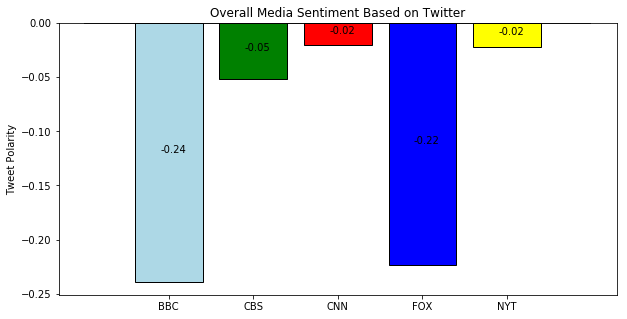

In [8]:
BBC_mean = np.mean(df2["BBC Compound"])
CBS_mean = np.mean(df2["CBS Compound"])
CNN_mean = np.mean(df2["CNN Compound"])
FOX_mean = np.mean(df2["FOX Compound"])
NYT_mean = np.mean(df2["NYT Compound"])

x_value = [BBC_mean, CBS_mean, CNN_mean, FOX_mean, NYT_mean]
x_axis = range(len(x_value))
my_colors = ["lightblue", "green", "red", "blue", "yellow"]
edge_colors = ["black", "black", "black", "black", "black"]
plt.figure(figsize = (10, 5))

plt.bar(x_axis, x_value, align = "center", color = my_colors, edgecolor = edge_colors)
plt.text(-0.1, (BBC_mean/2), round(BBC_mean, 2))
plt.text(0.9, (CBS_mean/2), round(CBS_mean, 2))
plt.text(1.9, (CNN_mean/2), round(CNN_mean, 2))
plt.text(2.9, (FOX_mean/2), round(FOX_mean, 2))
plt.text(3.9, (NYT_mean/2), round(NYT_mean, 2))
plt.hlines(0, -1, 5)
plt.xticks(x_axis, ["BBC", "CBS", "CNN", "FOX", "NYT"], rotation = "horizontal")
plt.title("Overall Media Sentiment Based on Twitter")
plt.ylabel("Tweet Polarity")
plt.savefig("Figure2.png")
plt.show()

### Observations.
    # There are two different plots: a scatter plot of all compound scores for the five networks, and a bar graph
      for the averaged compound score for all five networks.
### Conclusions.
    # Based on the scatter plot, most of the dots fall below the x-axis.  This indicates that it is likely that
      the overall sentiments for the news networks will be negative.  However, it is difficult to determine or 
      compare which networks may hold more negative sentiment than the other.
    # The bar graph gives a better impression of the data displayed by the scatter plot.  Both the BBC and FOX
      news networks have a more negative sentiment compared to CBS, CNN, or NYT.  However, based on the VADER
      documentation, none of these can be considered very negative.  All of the scores are considered neutral.  